In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Processing

In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


### Splitting Data

In [145]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [117]:
print(f"trainging input data shape={train_input.shape}")
print(f"trainging output data shape={train_output.shape}")
print(f"testing input data shape={test_input.shape}")
print(f"testing output data shape={test_output.shape}")

trainging input data shape=(500, 1)
trainging output data shape=(500, 1)
testing input data shape=(199, 1)
testing output data shape=(199, 1)


<font color="white" size='10px'><b>Linear Regression</b> </font>

forward propagation

f(x) = m*x + c

In [146]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

<font color="red" size='50px'><b>Cost Function</b> </font>

summation(1/2n*(y-f(x))^2)

In [147]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

<font color="red" size='40px'><b>Gradient Descent for Backpropagation</b> </font>

1. **df = summ((f(x)) - y)/n**
2. **dm = del(cost)/del(m)=df * x**
3. **dc = del(cost)/del(c)=df * 1**

**(d(cost)/dm = d(cost)/df * df/dm)**

In [148]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

### Update Parameters

In [149]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

<font color="red" size='50px'><b>Model Training</b> </font>

In [150]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 5741.9072468504255


<Figure size 640x480 with 0 Axes>

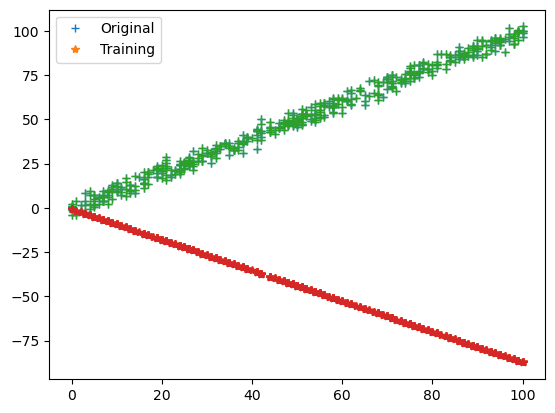

Iteration = 2, Loss = 2607.2594201410097


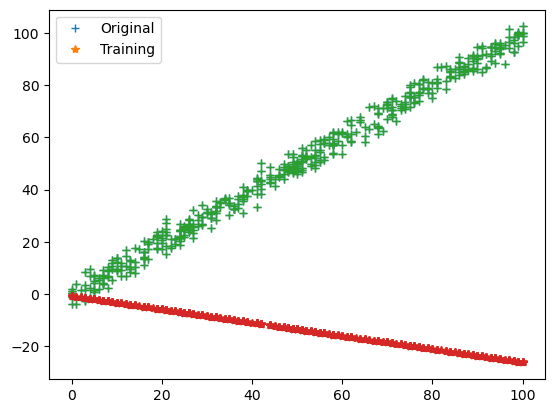

Iteration = 3, Loss = 1185.0662284169384


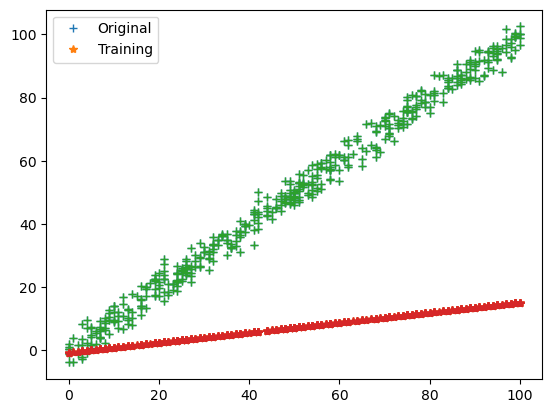

Iteration = 4, Loss = 539.8156013710836


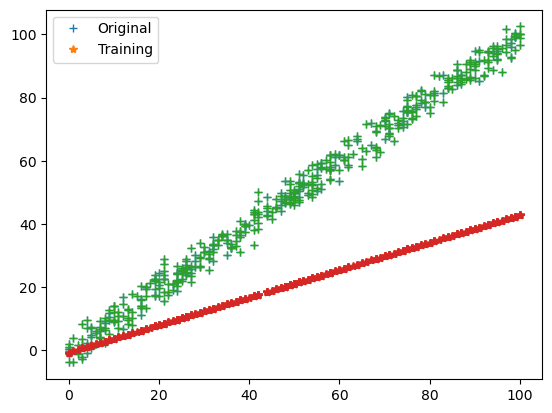

Iteration = 5, Loss = 247.06467649337546


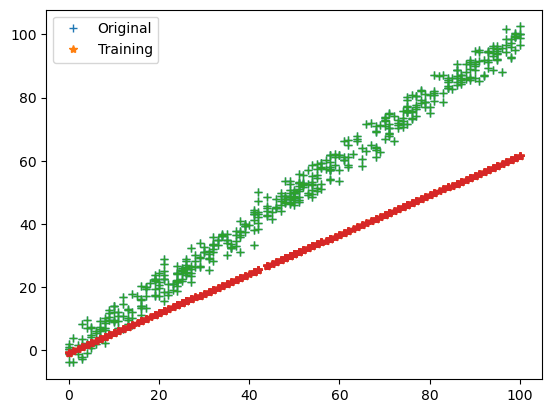

Iteration = 6, Loss = 114.24325693258791


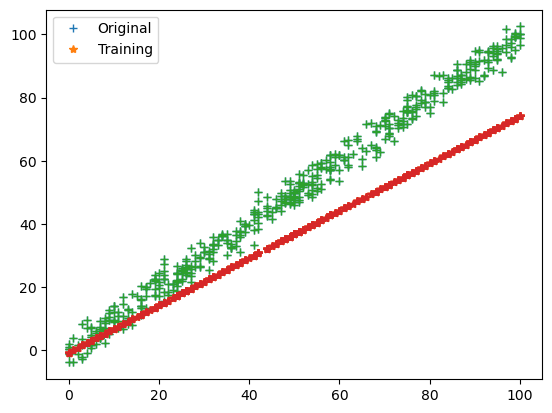

Iteration = 7, Loss = 53.98203107863296


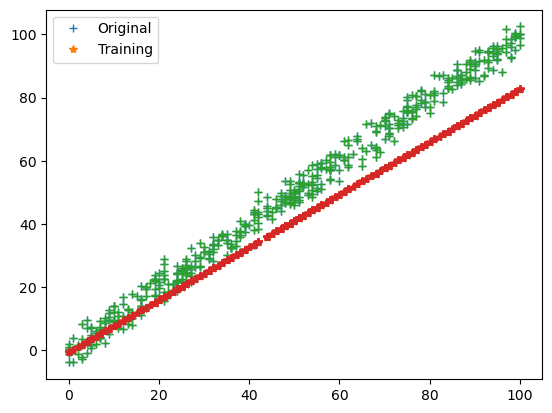

Iteration = 8, Loss = 26.64144548016325


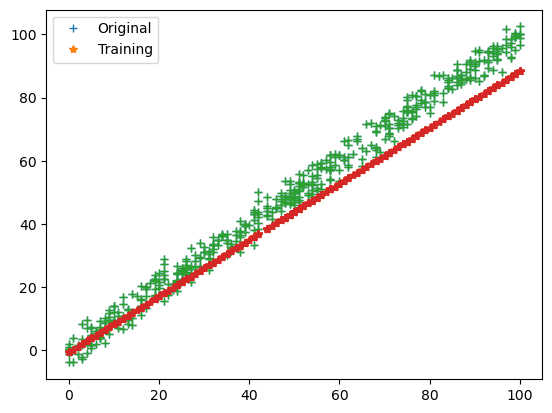

Iteration = 9, Loss = 14.236990829899499


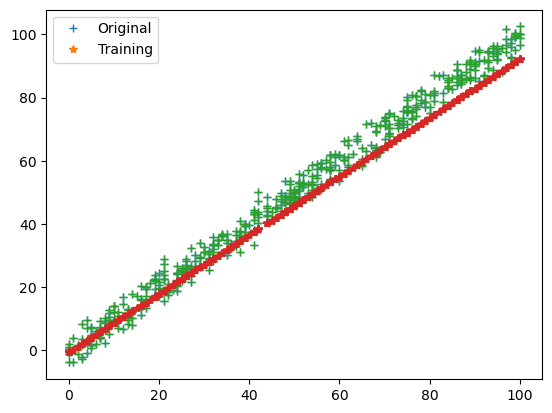

Iteration = 10, Loss = 8.609075334745231


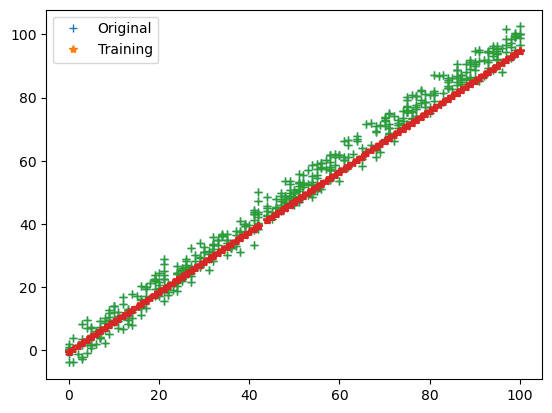

Iteration = 11, Loss = 6.055683160272503


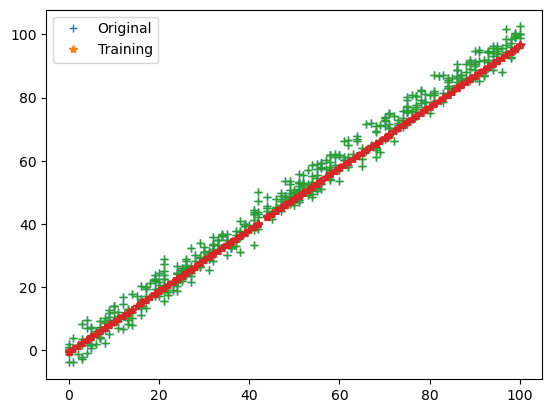

Iteration = 12, Loss = 4.897205621896015


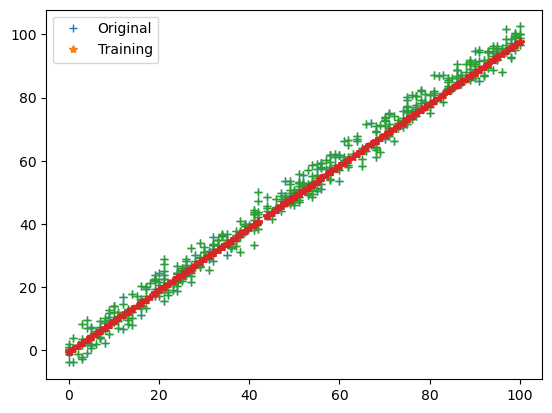

Iteration = 13, Loss = 4.371602399015622


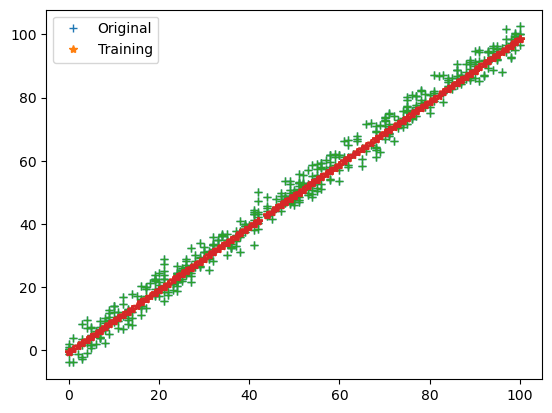

Iteration = 14, Loss = 4.133134954107754


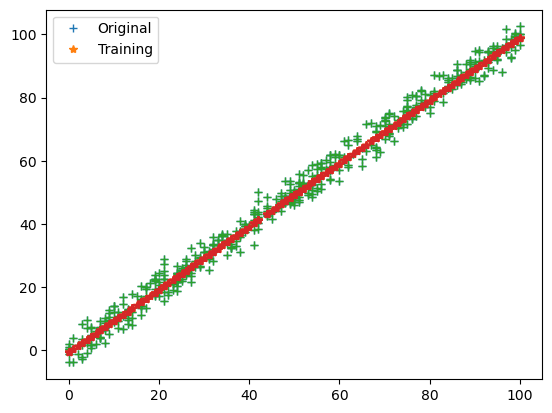

Iteration = 15, Loss = 4.0249413297437275


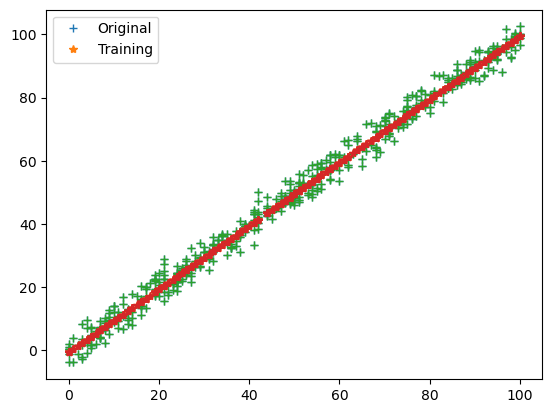

Iteration = 16, Loss = 3.975853082091371


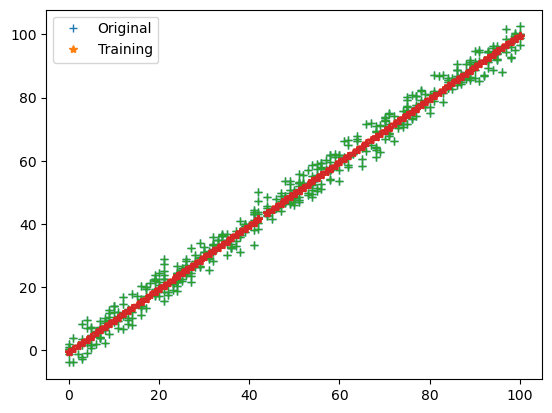

Iteration = 17, Loss = 3.953581009354924


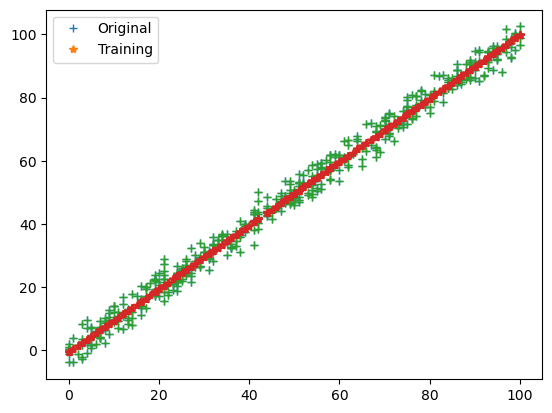

Iteration = 18, Loss = 3.9434754649148025


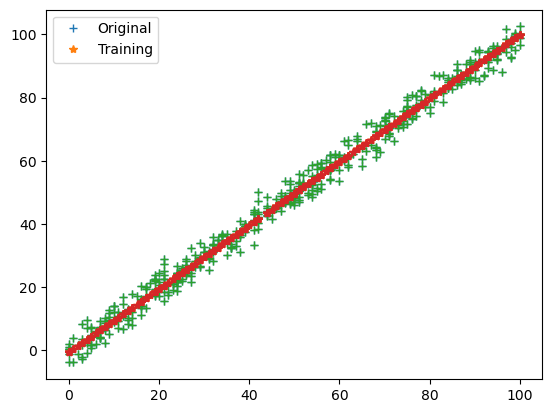

Iteration = 19, Loss = 3.9388898878731453


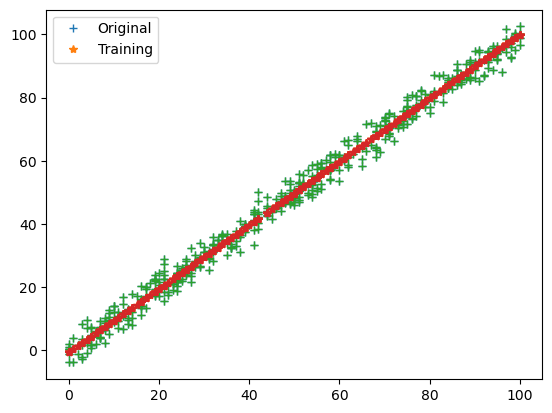

Iteration = 20, Loss = 3.936808726188583


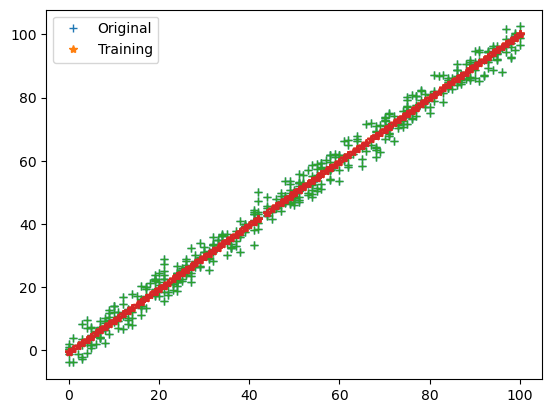

In [151]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [152]:
print(parameters)

{'m': 1.007013951772933, 'c': -0.6790410326391889}


In [153]:
loss

[5741.9072468504255,
 2607.2594201410097,
 1185.0662284169384,
 539.8156013710836,
 247.06467649337546,
 114.24325693258791,
 53.98203107863296,
 26.64144548016325,
 14.236990829899499,
 8.609075334745231,
 6.055683160272503,
 4.897205621896015,
 4.371602399015622,
 4.133134954107754,
 4.0249413297437275,
 3.975853082091371,
 3.953581009354924,
 3.9434754649148025,
 3.9388898878731453,
 3.936808726188583]

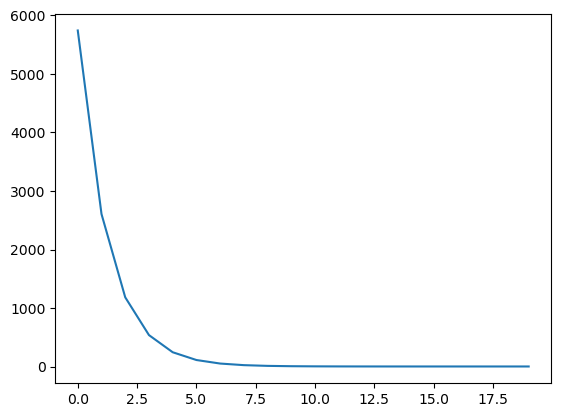

In [154]:
plt.plot(loss)

<font color="red" size='50px'><b>Prediction</b> </font>

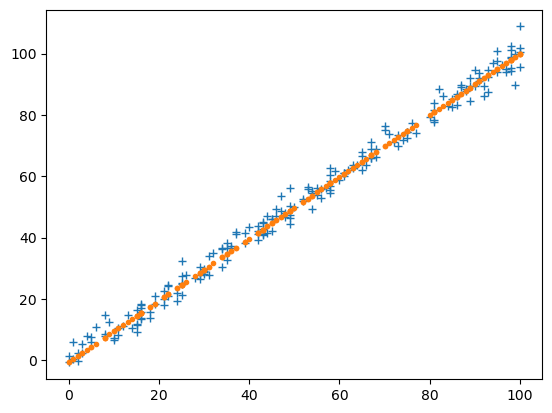

In [155]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [156]:
cost_function(test_predictions, test_output)

4.101445757636891